# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [38]:
import datetime

In [39]:
conda install scipy

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.4.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.4.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [40]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [43]:
cities

['afaahiti',
 'dzhangala',
 'labytnangi',
 'bilibino',
 'whitehorse',
 'west island',
 'inzhavino',
 'port-aux-francais',
 'puerto ayora',
 'cam pha mines',
 'college',
 'bredasdorp',
 'mananjary',
 'kill devil hills',
 'cadale',
 'sinabang',
 'kapuskasing',
 'kez',
 'kingston',
 'nova sintra',
 'neiafu',
 'hadibu',
 'arraial do cabo',
 'atafu village',
 'ketchikan',
 'waitangi',
 "kapa'a",
 'la sarre',
 'adamstown',
 'juan griego',
 'daru',
 'remire-montjoly',
 'edinburgh of the seven seas',
 'iqaluit',
 'carutapera',
 'yellowknife',
 'caleta de carquin',
 'zapolyarnyy',
 'avarua',
 'tsiombe',
 'floro',
 'taiohae',
 'carnarvon',
 'port elizabeth',
 'thompson',
 'geraldton',
 'namsos',
 'aldinga beach',
 'huntingburg',
 'nuuk',
 'didwana',
 'lata',
 'kerikeri',
 "usol'ye-sibirskoye",
 'niwai',
 'ilulissat',
 'tommot',
 'escanaba',
 'hawaiian paradise park',
 'puerto natales',
 'tual',
 'ushuaia',
 'hamilton',
 'margaret river',
 'bethel',
 'slavyanka',
 'castro',
 'puerto rico',
 'dune

---

In [44]:
cities=[ city.replace(" ","%20") for city in cities]

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
city_name = []
city_lat =[]
city_lon = []
city_country = []
city_humidity = []
city_max_temp =[]
city_clouds =[]
city_wind = []
city_date = []
new_city = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metrics"
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        city_weather = requests.get(city_url)
        city_weather_data = city_weather.json()

        print(city_weather_data)

        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        
        city_lat.append(city_weather_data["coord"]["lat"])
        print(2)
        city_lon.append(city_weather_data["coord"]["lon"])
        print(2.1)
        city_max_temp.append(city_weather_data["main"]["temp_max"])
        print(2.2)
        city_humidity.append(city_weather_data["main"]["humidity"])
        print(2.3)
        city_clouds.append(city_weather_data["clouds"]["all"])
        print(3)
        city_wind.append(city_weather_data["wind"]["speed"])
        city_country.append(city_weather_data["sys"]["country"])
        city_date.append(city_weather_data["dt"])
        new_city.append(city)
        # Append the City information into city_data list
       

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Append the City information into city_data list    
city_data ={"City": new_city, 
                          "Lat": city_lat, 
                          "Lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | afaahiti
{'coord': {'lon': -149.2833, 'lat': -17.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 302.08, 'feels_like': 308.8, 'temp_min': 302.07, 'temp_max': 302.08, 'pressure': 1015, 'humidity': 85, 'sea_level': 1015, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 9.71, 'deg': 87, 'gust': 10.4}, 'rain': {'1h': 0.17}, 'clouds': {'all': 77}, 'dt': 1715038463, 'sys': {'type': 1, 'id': 7318, 'country': 'PF', 'sunrise': 1715011930, 'sunset': 1715052911}, 'timezone': -36000, 'id': 4034745, 'name': 'Afaahiti', 'cod': 200}
2
2.1
2.2
2.3
3
Processing Record 2 of Set 1 | dzhangala
{'coord': {'lon': 50.3333, 'lat': 49.2167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 284.15, 'feels_like': 282.95, 'temp_min': 284.15, 'temp_max': 2

In [46]:
city_data

{'City': ['afaahiti',
  'dzhangala',
  'labytnangi',
  'bilibino',
  'whitehorse',
  'west%20island',
  'inzhavino',
  'port-aux-francais',
  'puerto%20ayora',
  'cam%20pha%20mines',
  'college',
  'bredasdorp',
  'mananjary',
  'kill%20devil%20hills',
  'cadale',
  'sinabang',
  'kapuskasing',
  'kez',
  'kingston',
  'nova%20sintra',
  'neiafu',
  'hadibu',
  'arraial%20do%20cabo',
  'atafu%20village',
  'ketchikan',
  'waitangi',
  "kapa'a",
  'la%20sarre',
  'adamstown',
  'juan%20griego',
  'daru',
  'remire-montjoly',
  'edinburgh%20of%20the%20seven%20seas',
  'iqaluit',
  'carutapera',
  'yellowknife',
  'caleta%20de%20carquin',
  'zapolyarnyy',
  'avarua',
  'tsiombe',
  'floro',
  'carnarvon',
  'port%20elizabeth',
  'thompson',
  'geraldton',
  'namsos',
  'aldinga%20beach',
  'huntingburg',
  'nuuk',
  'didwana',
  'lata',
  'kerikeri',
  "usol'ye-sibirskoye",
  'niwai',
  'ilulissat',
  'tommot',
  'escanaba',
  'hawaiian%20paradise%20park',
  'puerto%20natales',
  'tual',


In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lon           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,302.08,85,77,9.71,PF,1715038463
1,dzhangala,49.2167,50.3333,284.15,63,29,2.44,KZ,1715038464
2,labytnangi,66.6572,66.4183,254.47,94,30,3.27,RU,1715038464
3,bilibino,68.0546,166.4372,271.05,89,85,1.37,RU,1715038464
4,whitehorse,60.7161,-135.0538,278.60,88,100,2.06,CA,1715038464


In [49]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [50]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,302.08,85,77,9.71,PF,1715038463
1,dzhangala,49.2167,50.3333,284.15,63,29,2.44,KZ,1715038464
2,labytnangi,66.6572,66.4183,254.47,94,30,3.27,RU,1715038464
3,bilibino,68.0546,166.4372,271.05,89,85,1.37,RU,1715038464
4,whitehorse,60.7161,-135.0538,278.60,88,100,2.06,CA,1715038464


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

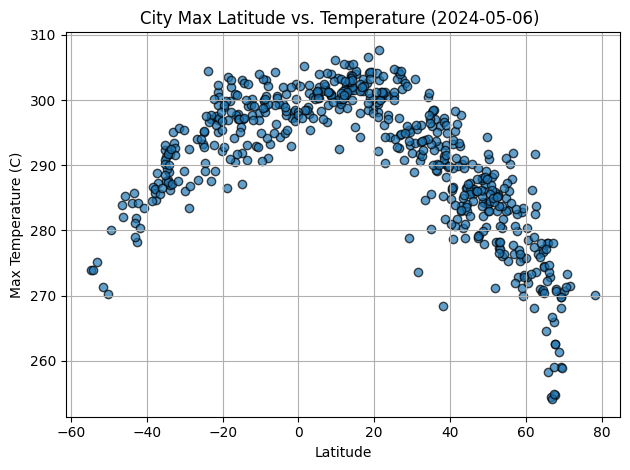

In [51]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.7, edgecolors="k")
#Format date
date = datetime.datetime.now()
date = date.strftime("%Y-%m-%d")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Max Latitude vs. Temperature ({date}) ")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

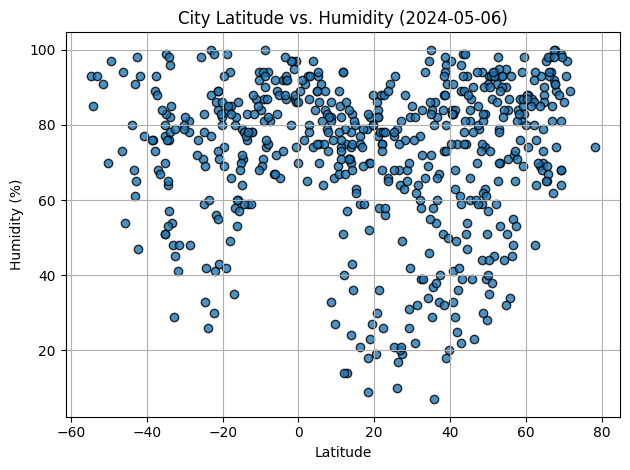

In [53]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")

date = datetime.datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

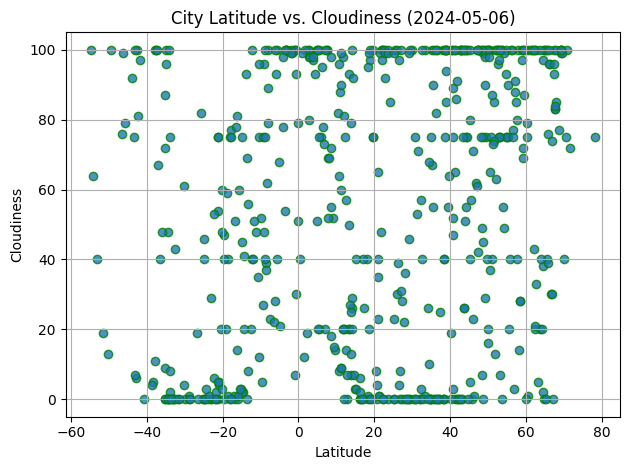

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="green")

date = datetime.datetime.now()
date = date.strftime("%Y-%m-%d")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

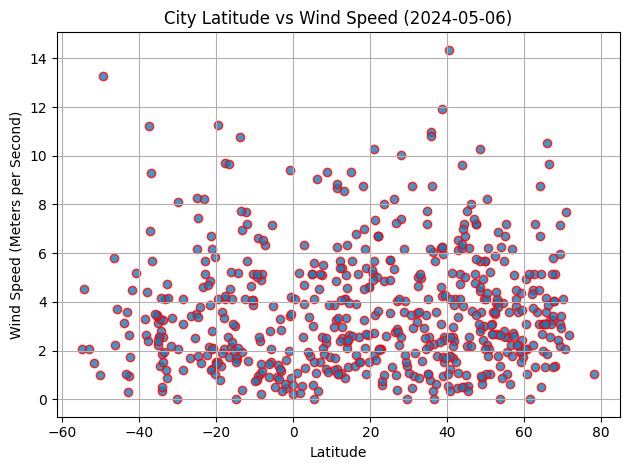

In [56]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="red")

date = datetime.datetime.now()
date = date.strftime("%Y-%m-%d")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Meters per Second)")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.grid(True)
plt.tight_layout()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [58]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,dzhangala,49.2167,50.3333,284.15,63,29,2.44,KZ,1715038464
2,labytnangi,66.6572,66.4183,254.47,94,30,3.27,RU,1715038464
3,bilibino,68.0546,166.4372,271.05,89,85,1.37,RU,1715038464
4,whitehorse,60.7161,-135.0538,278.60,88,100,2.06,CA,1715038464
6,inzhavino,52.3185,42.4937,282.91,91,100,5.87,RU,1715038465


In [59]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,302.08,85,77,9.71,PF,1715038463
5,west%20island,-12.1568,96.8225,300.14,78,40,7.20,CC,1715038465
7,port-aux-francais,-49.3500,70.2167,280.08,97,100,13.27,TF,1715038465
8,puerto%20ayora,-0.7393,-90.3518,297.34,97,30,0.89,EC,1715038465
11,bredasdorp,-34.5322,20.0403,287.70,64,0,1.37,ZA,1715038459


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [ ]:
regress_values

City_ID
0      298.064096
1      305.282586
3      283.240659
5      284.061458
8      305.790010
          ...    
592    283.737174
593    281.426933
594    277.392027
597    292.140539
599    288.381930
Name: Lat, Length: 410, dtype: float64

The r-value is -0.8398440331234512


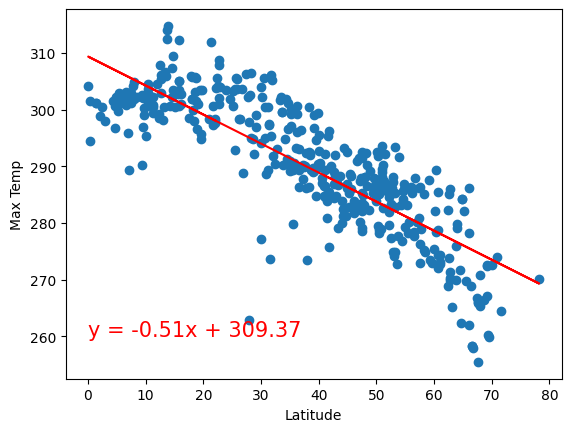

In [ ]:
#Plot Values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,260),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

In [ ]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

The r-value is 0.7741388855877452


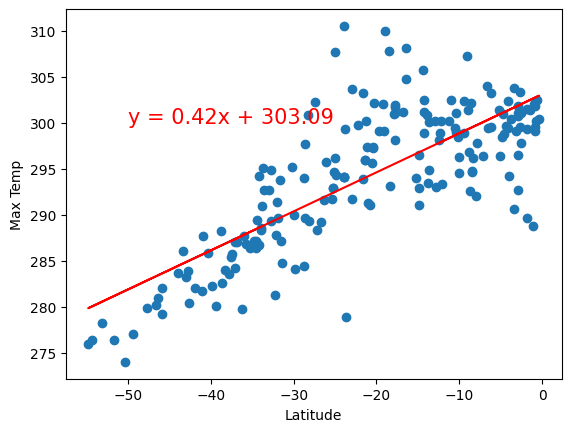

In [ ]:
#plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-50,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** The analysis reveals a negative correlation between temperature and latitude in the northern hemisphere. As one moves away from the equator towards higher latitudes, the temperature tends to decrease. On the other hand, in the southern hemisphere, there is a slight positive correlation observed between temperature and latitude. As the latitude increases, indicating a movement closer to the equator, the maximum temperature generally tends to increase.

### Humidity vs. Latitude Linear Regression Plot

In [60]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [61]:
regress_values

City_ID
1      72.600833
2      75.422718
3      75.648819
4      74.461444
6      73.102707
         ...    
567    64.701043
568    70.572014
569    72.094947
570    74.252835
572    75.833967
Name: Lat, Length: 397, dtype: float64

The r-value is 0.1476030709507535


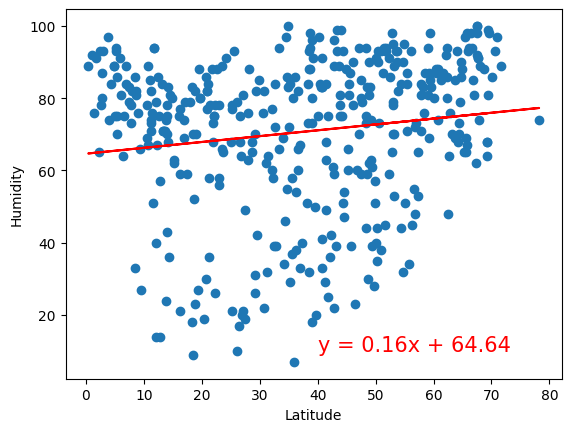

In [65]:
#Plot Values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

The r-value is 0.16091621783183124


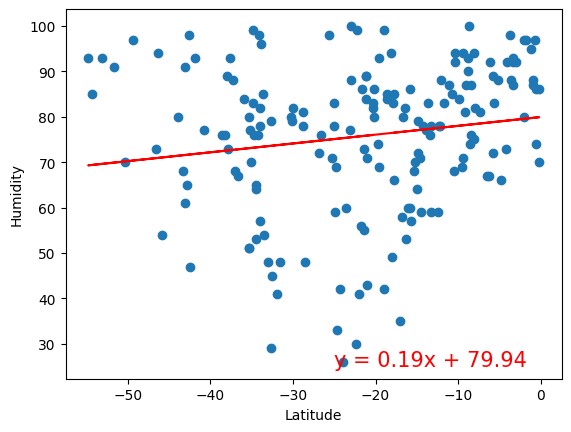

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot Values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:**
**The connection seems to be slightly positive, but there isn't a clear correlation between humidity and latitude. It can be seen that humidity tends to increase as cities approach the equator.

### Cloudiness vs. Latitude Linear Regression Plot

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [70]:
regress_values

City_ID
1      62.107730
2      68.333256
3      68.832069
4      66.212533
6      63.214942
         ...    
567    44.679539
568    57.631833
569    60.991665
570    65.752307
572    69.240537
Name: Lat, Length: 397, dtype: float64

The r-value is 0.17798171185283757


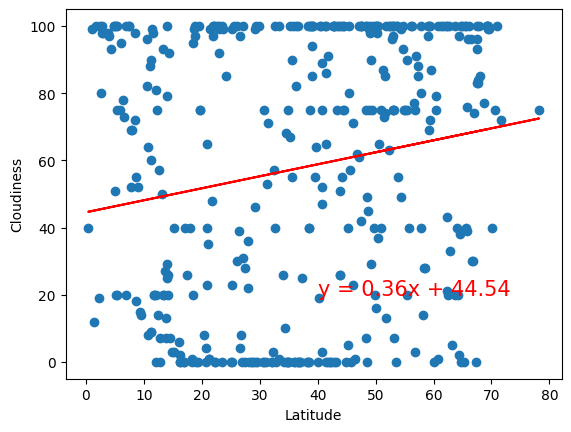

In [71]:
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is 0.1816062280070054


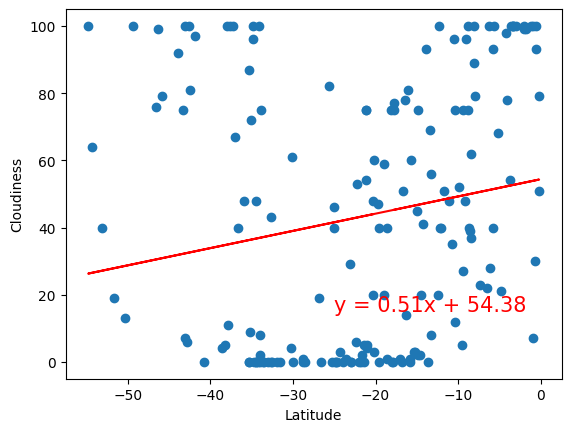

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** No correlation to be found between latitude and cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.013314723268188037


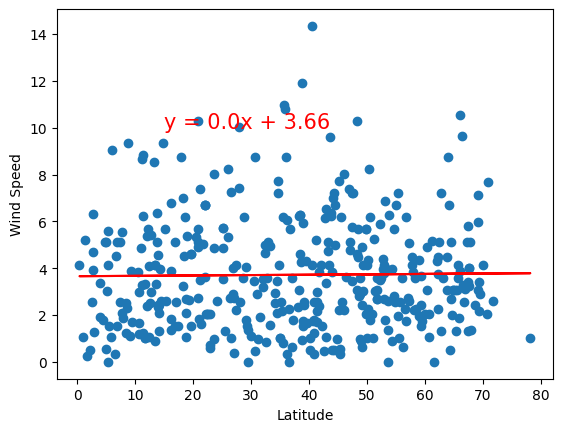

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.07740241597591078


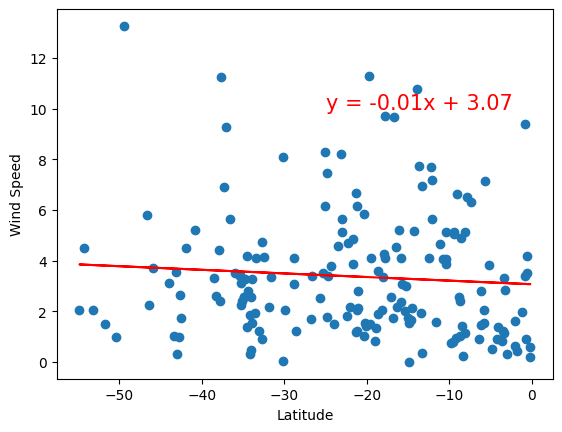

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** No correlation between latitude and windspeed